In [1060]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1061]:
df_dividend = pd.read_csv(r'C:\Users\bmatt\Desktop\Esercizio Power BI\Companies_ranked_by_Dividend_Yield.csv')

In [1062]:
df_dividend.head(3)

,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country
0,1,LianBio,LIAN,300940.0,0.243065,United States
1,2,Richter Gedeon,RIG2.F,150430.0,23.726825,Hungary
2,3,Delek Group,DLEKG.TA,117114.0,87.735884,Israel


In [1063]:
df_revenue = pd.read_csv(r'C:\Users\bmatt\Desktop\Esercizio Power BI\Companies_ranked_by_Revenue.csv')

In [1064]:
df_revenue.head(3)

,Rank,Name,Symbol,revenue_ttm,price (GBP),country
0,1,Walmart,WMT,665035000000,61.029186,United States
1,2,Amazon,AMZN,604334000000,143.454209,United States
2,3,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia


In [1065]:
df_marketcap = pd.read_csv(r'C:\Users\bmatt\Desktop\Esercizio Power BI\Companies_ranked_by_Market_Cap.csv')
df_marketcap.head(3)

,Rank,Name,Symbol,marketcap,price (GBP),country
0,1,Apple,AAPL,2.689903e+12,176.919492,United States
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States


In [1066]:
df_earnings = pd.read_csv(r'C:\Users\bmatt\Desktop\Esercizio Power BI\Companies_ranked_by_Earnings.csv')
df_earnings.head(3)

,Rank,Name,Symbol,earnings_ttm,price (GBP),country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States


In [1067]:
df_perati = pd.read_csv(r'C:\Users\bmatt\Desktop\Esercizio Power BI\Companies_ranked_by_P_E_ratio.csv')
df_perati.head(3)

,Rank,Name,Symbol,pe_ratio_ttm,price (GBP),country
0,1,Imperial Petroleum,IMPP,0.109943,3.108797,Greece
1,2,Vertex Energy,VTNR,0.188889,0.092197,United States
2,3,Spin Master,TOY.TO,0.224758,17.414443,Canada


In [1068]:
df_new = df_revenue.merge(df_earnings, how='inner', on="Symbol")

In [1069]:
df_new = df_new.merge(df_dividend, how='inner', on="Symbol")

In [1070]:
df_new.columns

Index(['Rank_x', 'Name_x', 'Symbol', 'revenue_ttm', 'price (GBP)_x',
       'country_x', 'Rank_y', 'Name_y', 'earnings_ttm', 'price (GBP)_y',
       'country_y', 'Rank', 'Name', 'dividend_yield_ttm', 'price (GBP)',
       'country'],
      dtype='object')

In [1071]:
df_new = df_new[["Symbol", "Name",  "country", "revenue_ttm", "earnings_ttm", "dividend_yield_ttm"]]

In [1072]:
df_new

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm
0,WMT,Walmart,United States,665035000000,2.445100e+10,99.7744
1,AMZN,Amazon,United States,604334000000,5.685500e+10,0.0000
2,2222.SR,Saudi Aramco,Saudi Arabia,495354806850,2.283780e+11,236.3260
3,600028.SS,Sinopec,China,435696880608,1.417190e+10,203.1610
4,601857.SS,PetroChina,China,429671599508,3.722760e+10,475.6980
...,...,...,...,...,...,...
9907,KINV-A.ST,Kinnevik,Sweden,-755524598,-7.975200e+08,2757.2400
9908,SOF.VI,Sofina,Belgium,-1960650040,-2.009210e+09,130.4970
9909,QLT.L,Quilter,United Kingdom,-4921465842,7.863700e+07,381.9910
9910,MNG.L,M&G plc,United Kingdom,-10545825404,-3.020870e+09,928.2240


In [1073]:
df_new = df_new.merge(df_marketcap, how='inner', on="Symbol")

In [1074]:
df_new = df_new.merge(df_perati, how='inner', on="Symbol", suffixes=("_ma", "_per"))

In [1075]:
df_new = df_new[["Symbol", "Name", "country", "revenue_ttm", "earnings_ttm", "dividend_yield_ttm", "marketcap", "pe_ratio_ttm", "price (GBP)_per"]]

In [1076]:
df_new.columns

Index(['Symbol', 'Name', 'country', 'revenue_ttm', 'earnings_ttm',
       'dividend_yield_ttm', 'marketcap', 'pe_ratio_ttm', 'price (GBP)_per'],
      dtype='object')

In [1077]:
df_final = df_new.rename({"price (GBP)_per" : "price(GBP)"}, axis=1)

In [1078]:
df_countries = pd.read_csv(r"C:\Users\bmatt\Desktop\Esercizio Power BI\abbr.csv", sep=";")

In [1079]:
df_countries.columns

Index(['Name', 'Code', 'Unnamed: 2'], dtype='object')

In [1080]:
df_countries.drop("Unnamed: 2", axis=1, inplace=True)
df_countries.rename({"Name":"Country"}, axis=1, inplace=True)

In [1081]:
a = set(df_countries["Country"].unique())
b = set(df_final["country"].unique())

In [1082]:
b.difference(a)

{'British Virgin Islands',
 'Macau',
 'Russia',
 'South Korea',
 'USA',
 'Vietnam',
 nan}

In [1083]:
df_final = df_final.merge(df_countries, how='left', left_on="country", right_on="Country")

In [1084]:
df_final.loc[df_final["country"]=="British Virgin Islands", "Code"] = "BVI"
df_final.loc[df_final["country"]=="Macau", "Code"] = "MAC"
df_final.loc[df_final["country"]=="Russia", "Code"] = "Rus"
df_final.loc[df_final["country"]=="South Korea", "Code"] = "SK"
df_final.loc[df_final["country"]=="USA", "Code"] = "US"
df_final.loc[df_final["country"]=="Vietnam", "Code"] = "Viet"

In [1085]:
df_final[df_final["Code"].isnull()]

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code
473,CEC.DE,Ceconomy,NaN,24413722634,3.694240e+08,0.000,1.335643e+09,-7476.3300,2.752649,NaN,NaN
2692,BPHLY,Bank of the Philippine Islands,NaN,2715803303,1.286160e+09,265.417,8.439931e+09,13.4332,31.659438,NaN,NaN


In [1086]:
round(df_final.describe(),0)

,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP)
count,9.912000e+03,9.912000e+03,9912.0,9.912000e+03,9.912000e+03,9912.0
mean,5.708766e+09,7.112681e+08,241.0,8.742851e+09,-3.262565e+14,53.0
std,2.293079e+10,4.203526e+09,3761.0,5.790654e+10,4.959314e+16,360.0
min,-3.922776e+10,-1.730700e+10,0.0,0.000000e+00,-4.677980e+18,0.0
25%,1.191801e+08,-4.533800e+06,0.0,2.170071e+08,-1.000000e+00,2.0
50%,6.672010e+08,5.368220e+07,0.0,1.068007e+09,9.000000e+00,9.0
75%,3.151069e+09,3.610988e+08,235.0,4.639848e+09,2.500000e+01,29.0
max,6.650350e+11,2.283780e+11,300940.0,2.689903e+12,1.573740e+18,16550.0


Correlation

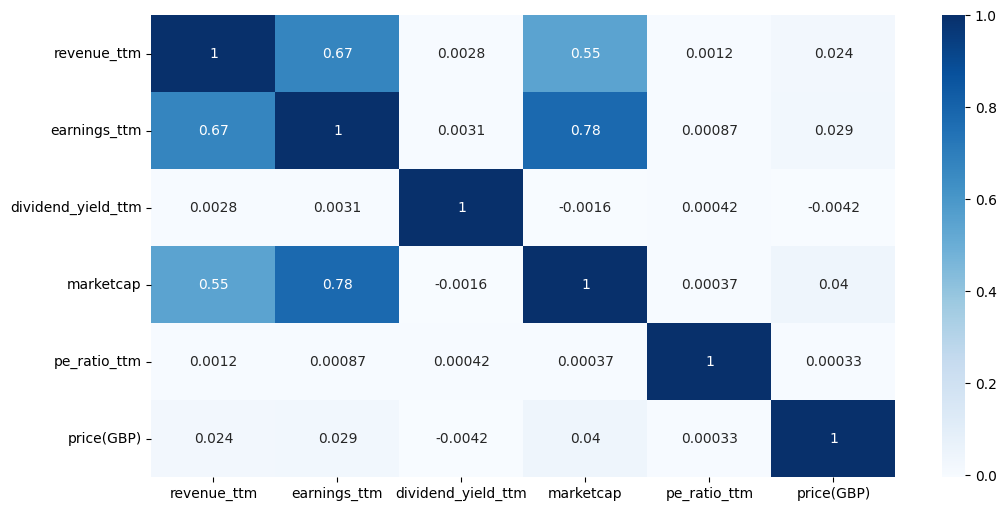

In [1087]:
plt.figure(figsize=(12,6))

sns.heatmap(df_final.corr(numeric_only=True),
            annot=True,
            cmap="Blues");

Place & Data

In [1088]:
df_final.sort_values("revenue_ttm", ascending=False)[0:10]["Name"]

0               Walmart
1                Amazon
2          Saudi Aramco
3               Sinopec
4            PetroChina
5    Berkshire Hathaway
6                 Apple
7          UnitedHealth
8            CVS Health
9            Volkswagen
Name: Name, dtype: object

In [1089]:
df_final.columns

Index(['Symbol', 'Name', 'country', 'revenue_ttm', 'earnings_ttm',
       'dividend_yield_ttm', 'marketcap', 'pe_ratio_ttm', 'price(GBP)',
       'Country', 'Code'],
      dtype='object')

In [1090]:
df_final.sort_values("pe_ratio_ttm", ascending=False)

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code
5952,CRNT,Ceragon Networks,Israel,362205000,24488000.0,0.0000,1.794676e+08,1.573740e+18,2.089980,Israel,IL
8069,IQG.L,IQGeo Group,United Kingdom,56673916,72618.0,0.0000,3.313214e+08,7.575530e+06,4.780004,United Kingdom,GB
5278,DARK.L,Darktrace,United Kingdom,545430000,41035000.0,0.0000,3.694898e+09,3.788920e+05,5.777996,United Kingdom,GB
5360,NIND.KW,National Industries Group Holding,Kuwait,519753984,356951000.0,0.0000,1.337037e+09,3.459630e+05,556.375572,Kuwait,KW
8537,GIH.KW,Gulf Investment House Company,Kuwait,24085804,1768830.0,0.0000,7.497282e+08,2.369150e+05,1843.775569,Kuwait,KW
...,...,...,...,...,...,...,...,...,...,...,...
8469,BKS.L,Beeks Financial Cloud Group,United Kingdom,28879425,-826289.0,0.0000,1.666477e+08,-1.857380e+05,2.499998,United Kingdom,GB
8042,NINV.KW,National Investments Company (Kuwait),Kuwait,58845660,28789100.0,0.0000,4.672971e+08,-3.064160e+05,583.819848,Kuwait,KW
4399,MEZZAN.KW,Mezzan Holding Company,Kuwait,921089771,51519700.0,0.0000,6.998215e+08,-1.268410e+06,2252.948089,Kuwait,KW
5106,DBRG,DigitalBridge Group,United States,611019000,803225000.0,27.7971,2.031907e+09,-1.296140e+17,10.915077,United States,US


In [1091]:
df_final = df_final.drop(df_final[df_final["Symbol"].isin(["CRNT", "IQG.L"])].index)

In [1092]:
df_final.sort_values("pe_ratio_ttm", ascending=False)

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code
5278,DARK.L,Darktrace,United Kingdom,545430000,41035000.0,0.0000,3.694898e+09,3.788920e+05,5.777996,United Kingdom,GB
5360,NIND.KW,National Industries Group Holding,Kuwait,519753984,356951000.0,0.0000,1.337037e+09,3.459630e+05,556.375572,Kuwait,KW
8537,GIH.KW,Gulf Investment House Company,Kuwait,24085804,1768830.0,0.0000,7.497282e+08,2.369150e+05,1843.775569,Kuwait,KW
6725,KCEM.KW,Kuwait Cement Company,Kuwait,215039422,23499900.0,0.0000,3.468738e+08,1.047660e+05,486.516794,Kuwait,KW
7791,KINV.KW,Kuwait Investment Company,Kuwait,83199074,54316700.0,0.0000,2.102009e+08,6.837150e+04,376.738931,Kuwait,KW
...,...,...,...,...,...,...,...,...,...,...,...
8469,BKS.L,Beeks Financial Cloud Group,United Kingdom,28879425,-826289.0,0.0000,1.666477e+08,-1.857380e+05,2.499998,United Kingdom,GB
8042,NINV.KW,National Investments Company (Kuwait),Kuwait,58845660,28789100.0,0.0000,4.672971e+08,-3.064160e+05,583.819848,Kuwait,KW
4399,MEZZAN.KW,Mezzan Holding Company,Kuwait,921089771,51519700.0,0.0000,6.998215e+08,-1.268410e+06,2252.948089,Kuwait,KW
5106,DBRG,DigitalBridge Group,United States,611019000,803225000.0,27.7971,2.031907e+09,-1.296140e+17,10.915077,United States,US


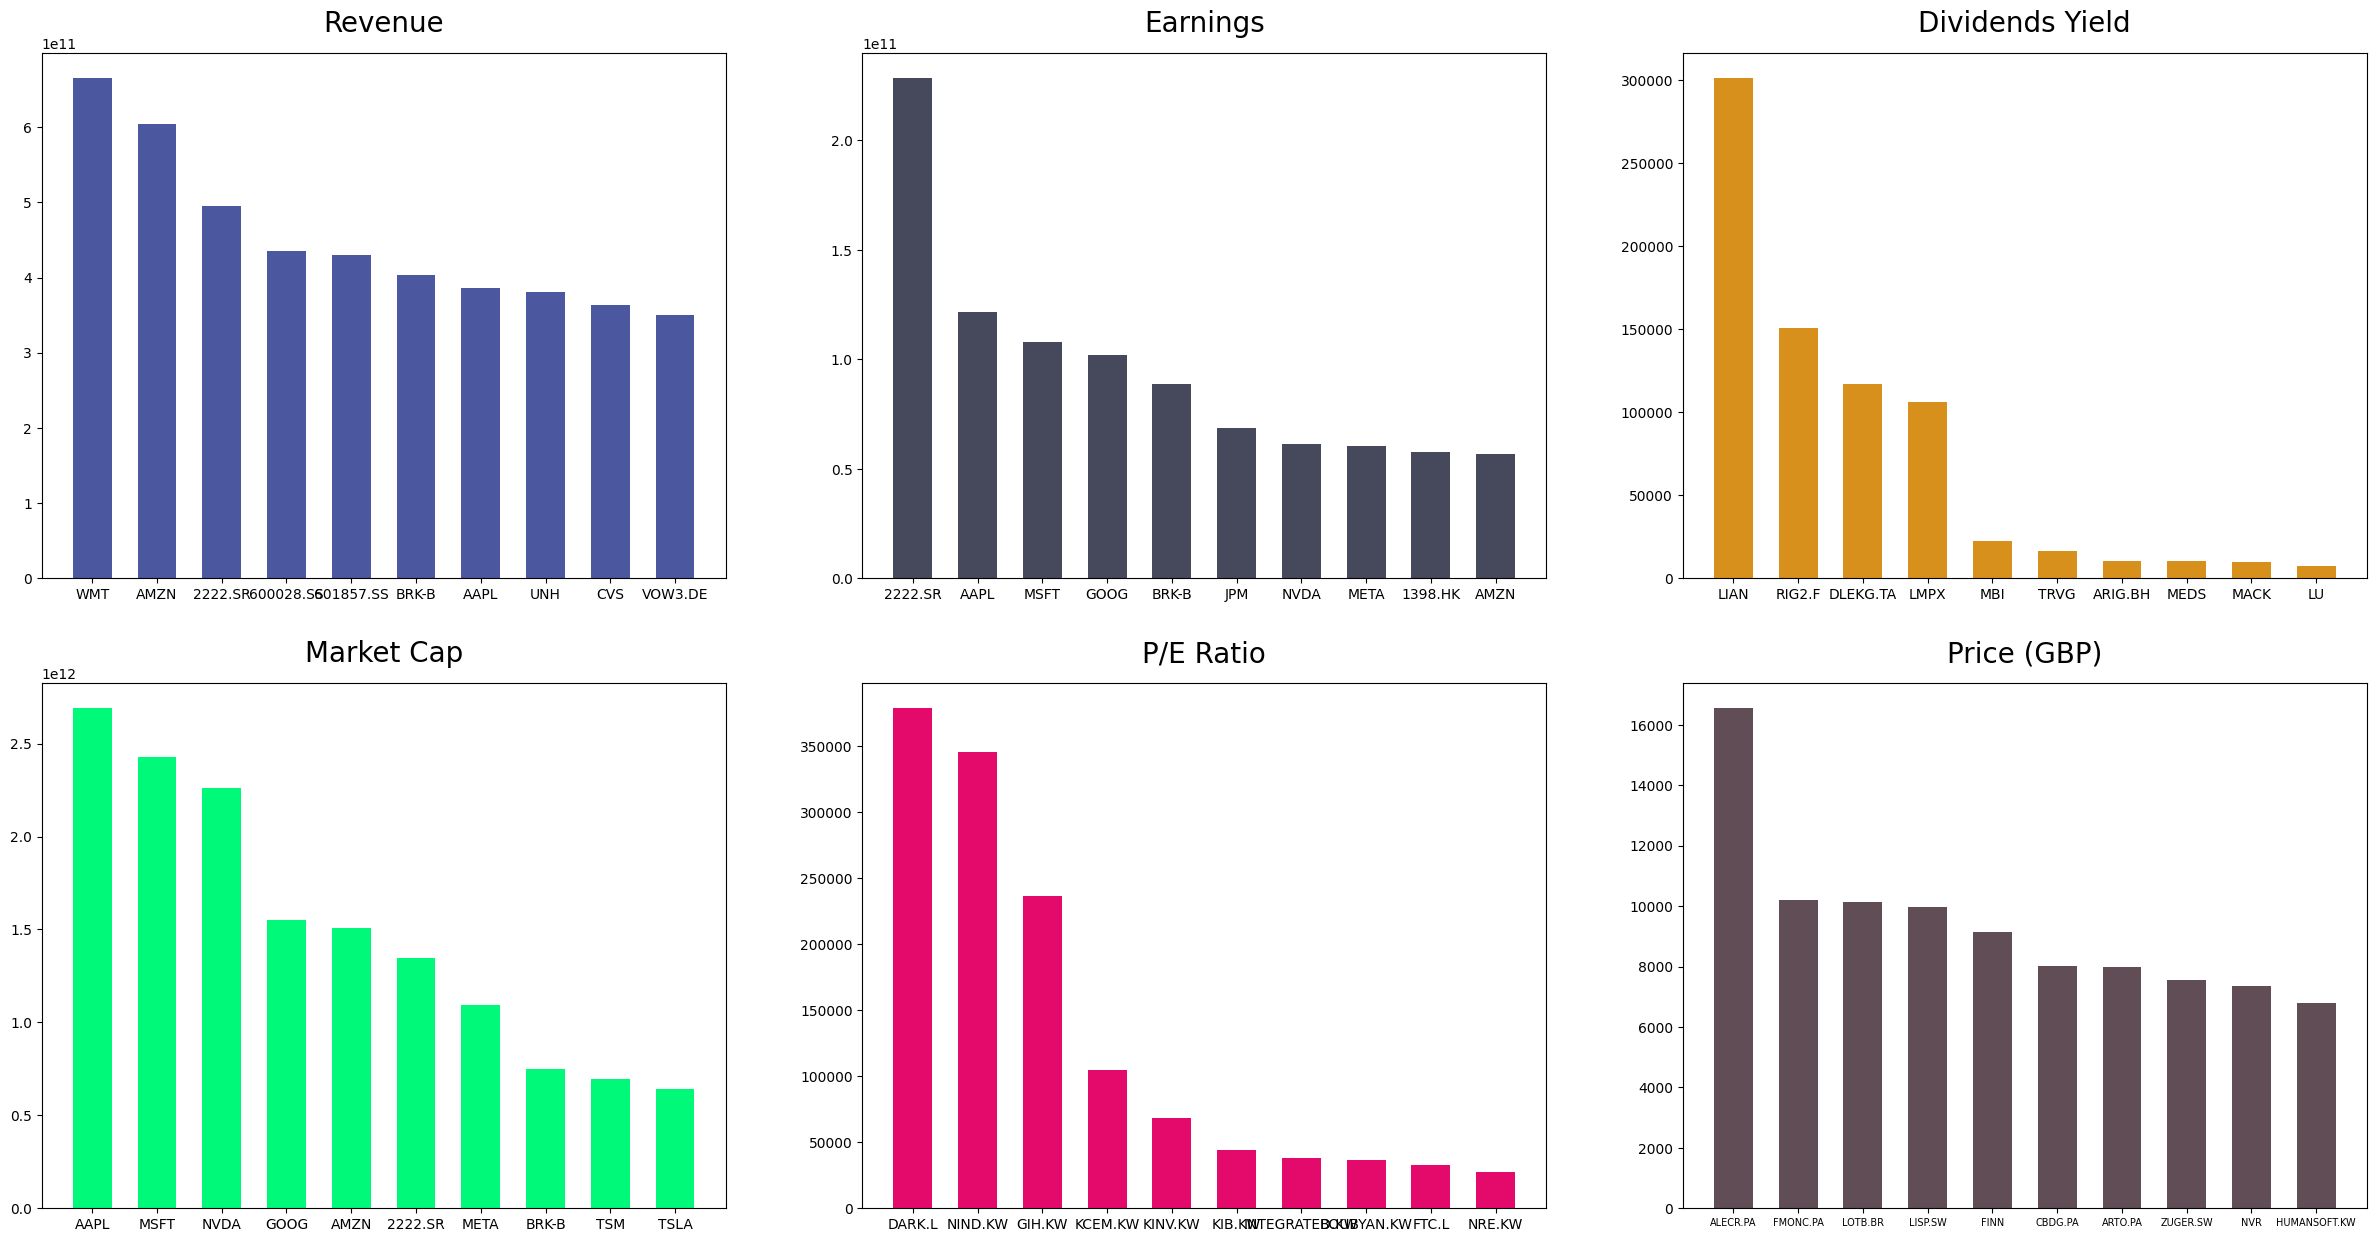

In [1093]:
lista_colonne = ["revenue_ttm", "earnings_ttm", "dividend_yield_ttm", "marketcap", "pe_ratio_ttm", "price(GBP)"]
lista_colori = ["#4b579e", "#46495b", "#d8901d", "#00f979", "#e40a6c", "#604d56"]
lista_posizioni = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
lista_titoli = ["Revenue", "Earnings", "Dividends Yield", "Market Cap", "P/E Ratio", "Price (GBP)"]

fig, ax = plt.subplots(2,3, figsize=(30,15))

for colonna, colore, posizione, titolo in zip(lista_colonne, lista_colori, lista_posizioni, lista_titoli):

    ax[posizione].bar(
        df_final.sort_values(colonna, ascending=False)[0:10]["Symbol"],
        df_final.sort_values(colonna, ascending=False)[0:10][colonna],
        width=0.6,
        color = colore,
    )
    
    ax[posizione].set_title(titolo, fontdict={"fontsize": 20, "fontstyle":"normal"}, loc="center", pad=15.5)
    plt.xticks(size=7);

In [1094]:
df_final.sort_values("earnings_ttm", ascending=False)["country"].unique()[0:10]

array(['Saudi Arabia', 'United States', 'China', 'Japan', 'Taiwan',
       'France', 'Norway', 'United Kingdom', 'Australia', 'Switzerland'],
      dtype=object)

In [1095]:
df_final.sort_values("pe_ratio_ttm", ascending=False)["pe_ratio_ttm"].unique()[0:10].tolist()

[378892.0,
 345963.0,
 236915.0,
 104766.0,
 68371.5,
 43926.6,
 37981.4,
 36561.0,
 32629.8,
 27750.3]

C:\Users\bmatt\AppData\Local\Temp\ipykernel_24672\1914337734.py:19: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0,);


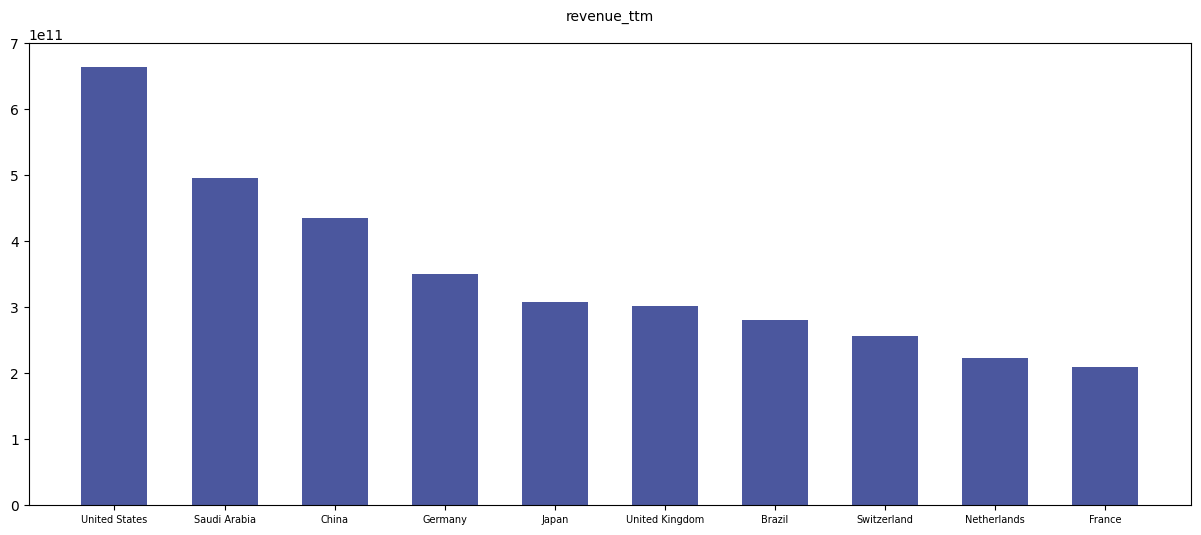

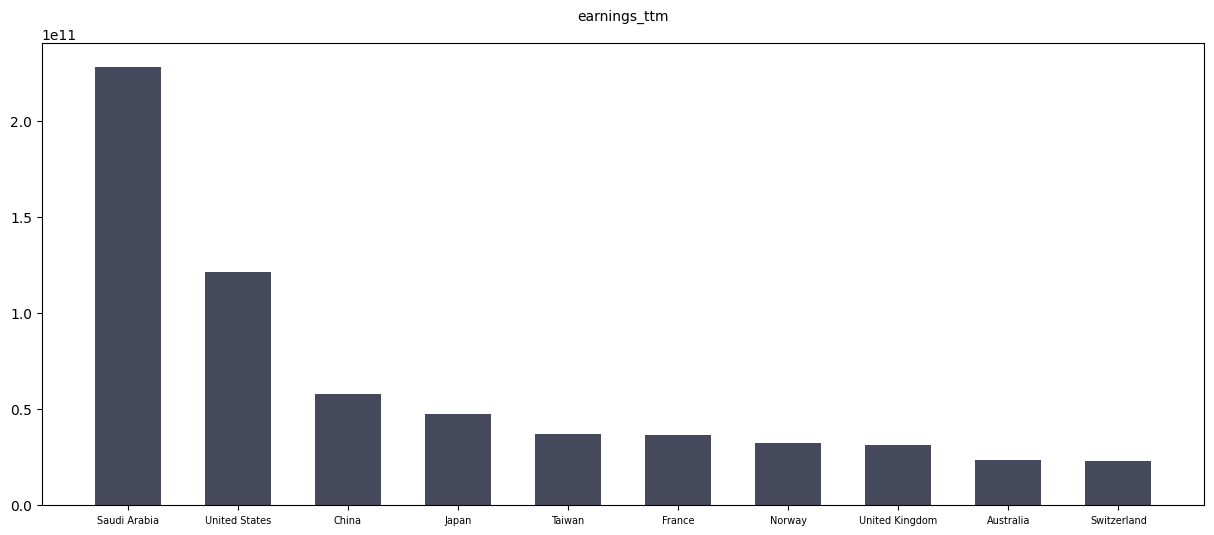

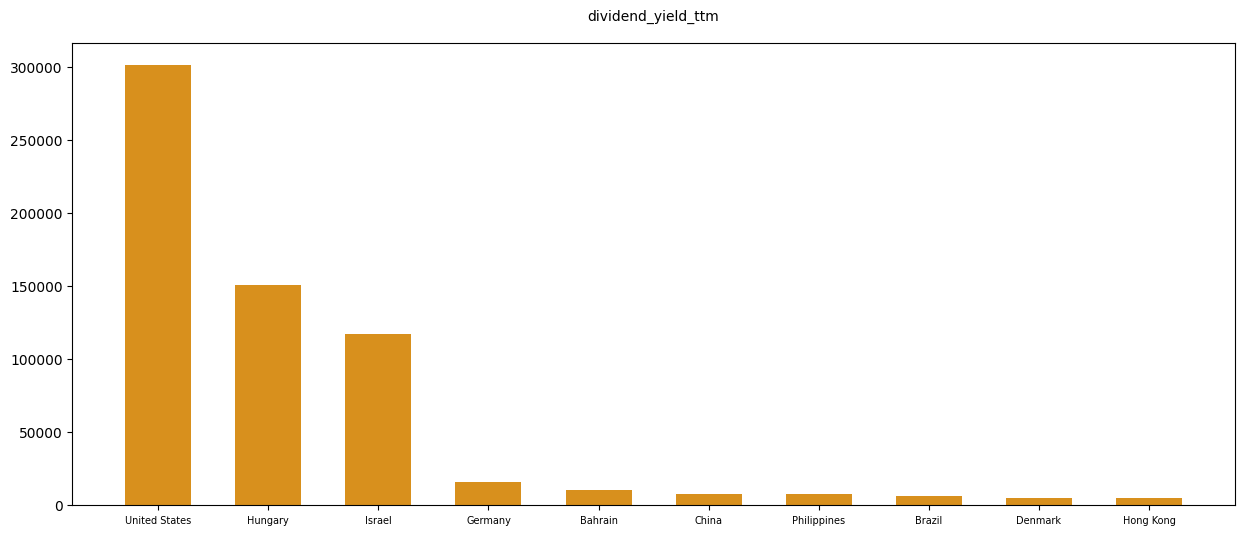

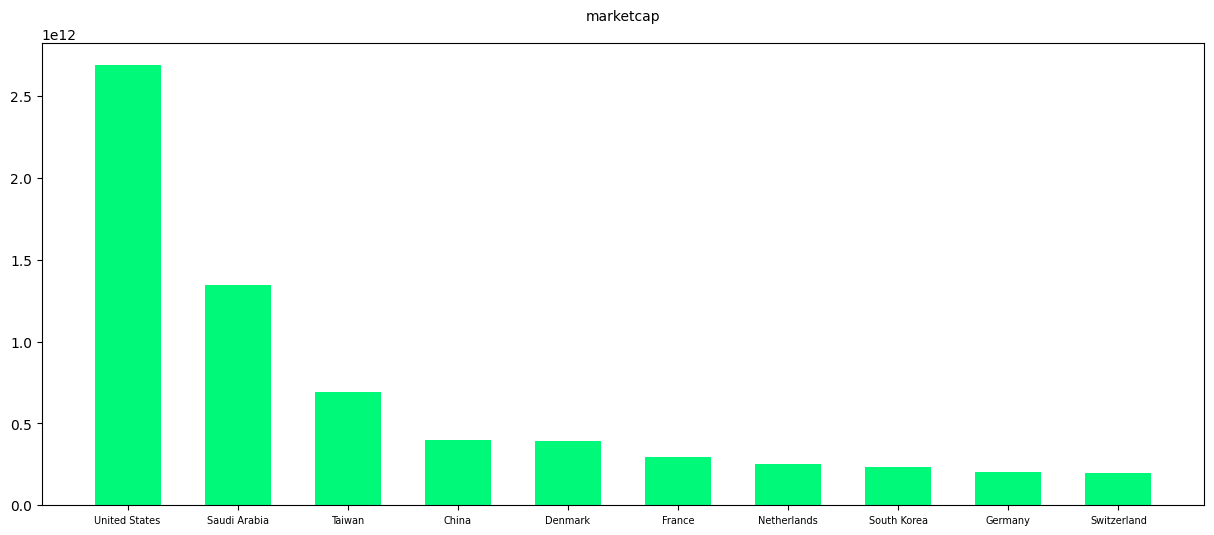

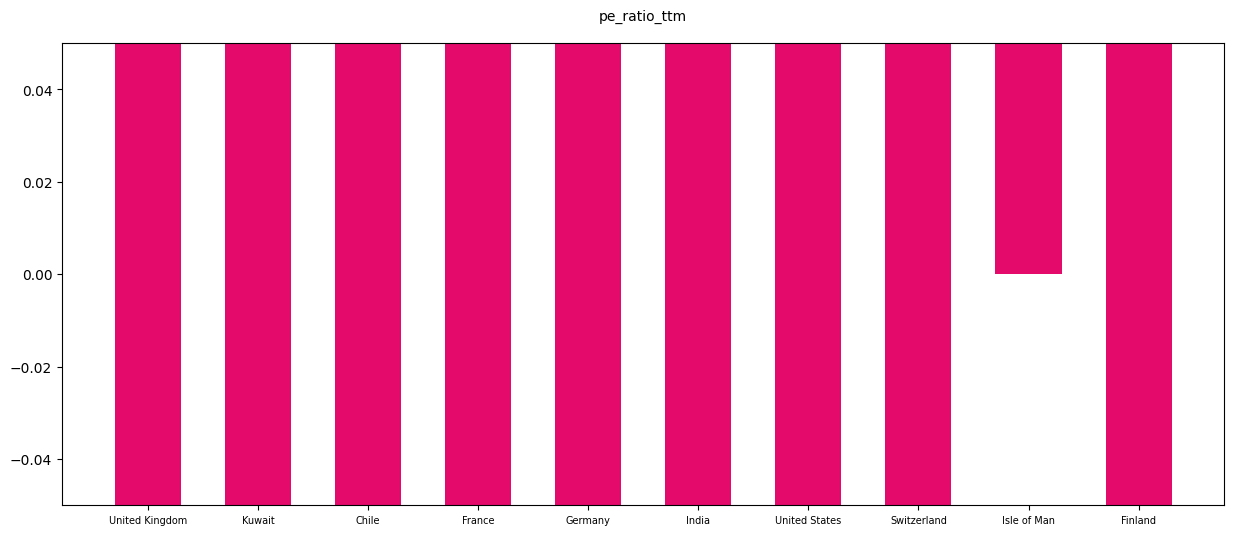

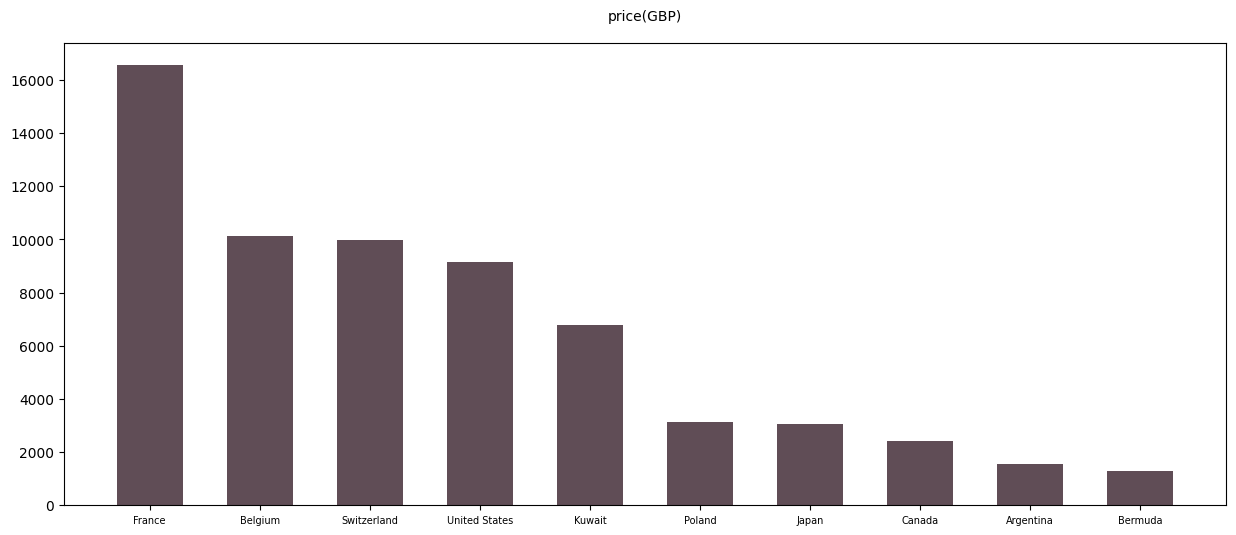

In [1096]:
lista_colonne = ["revenue_ttm", "earnings_ttm", "dividend_yield_ttm", "marketcap", "pe_ratio_ttm", "price(GBP)"]
lista_colori = ["#4b579e", "#46495b", "#d8901d", "#00f979", "#e40a6c", "#604d56"]
for colonna, colore in zip(lista_colonne, lista_colori):
    keep_toptencountry = df_final.sort_values(colonna, ascending=False)["country"].unique()[0:10].tolist()
    df = df_final[df_final["country"].isin(keep_toptencountry)]
    df = df.sort_values(colonna, ascending=False)
    
    plt.figure(figsize=(15,6))

    plt.bar(
        df["country"],
        df[colonna],
        width=0.6,
        color = colore
    )
    
    plt.title(colonna, fontdict={"fontsize": 10, "fontstyle":"normal"}, loc="center", pad=16.5)
    plt.xticks(size=7)
    plt.ylim(0,);

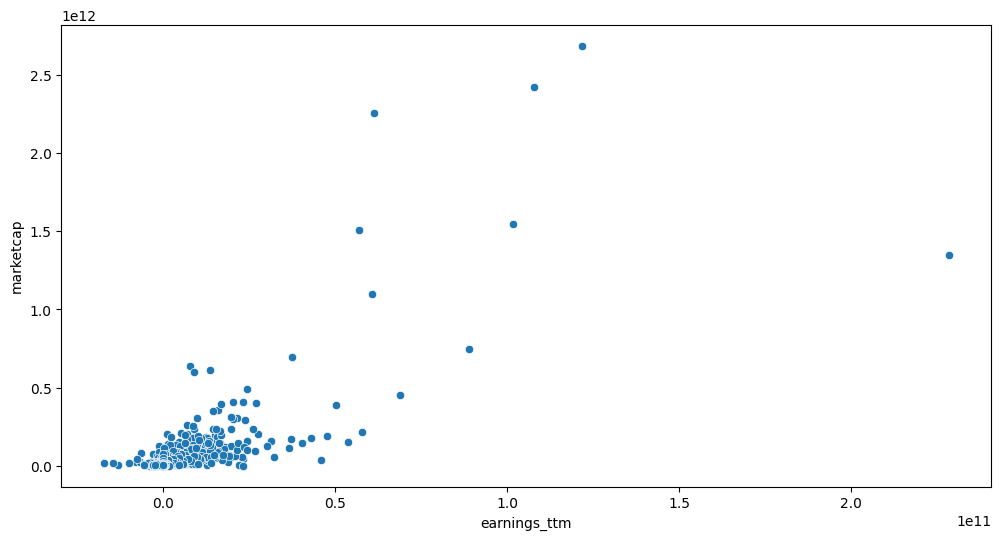

In [1097]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_final,
    x = "earnings_ttm",
    y = "marketcap"
);

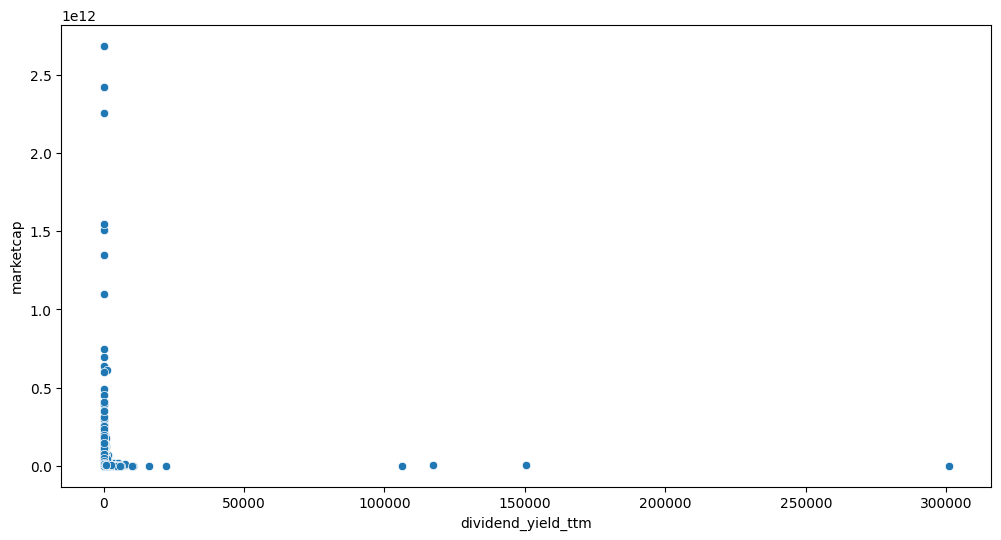

In [1098]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_final,
    x = "dividend_yield_ttm",
    y = "marketcap"
);

In [1099]:
df_pie = df_final.sort_values("marketcap", ascending=False)[0:10]

In [1100]:
df_pie.columns

Index(['Symbol', 'Name', 'country', 'revenue_ttm', 'earnings_ttm',
       'dividend_yield_ttm', 'marketcap', 'pe_ratio_ttm', 'price(GBP)',
       'Country', 'Code'],
      dtype='object')

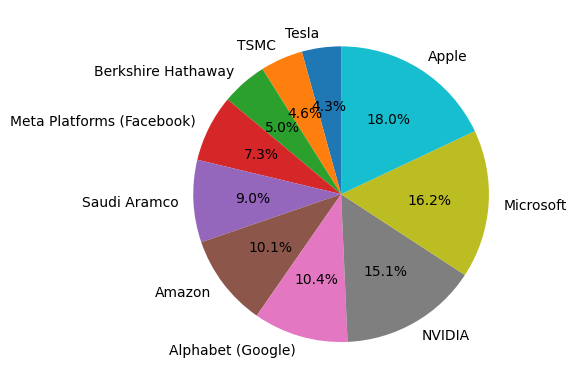

In [1101]:
plt.pie(
    x=df_pie["marketcap"][::-1],
    startangle=90,
    autopct="%.1f%%",
    pctdistance=0.6,
    labeldistance= 1.1,
    labels=df_pie["Name"][::-1]
);

In [1102]:
df_pie = df_final.groupby(['country', "Code"])[lista_colonne].sum()

In [1103]:
df_pie = pd.DataFrame(df_pie).reset_index()

In [1104]:
df_pie

,country,Code,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP)
0,Argentina,AR,64666622103,9.844205e+09,3481.065730,1.275772e+11,5.245290e+02,1801.716251
1,Australia,AU,655105652909,1.134531e+11,32619.298000,1.346758e+12,6.253797e+03,2248.084860
2,Austria,AT,201579927856,2.642092e+10,15327.453300,1.246062e+11,6.989681e+01,1655.066279
3,Bahamas,BS,847194000,6.772800e+07,0.000000,1.332004e+09,-3.333330e+00,12.739971
4,Bahrain,BH,11326918702,3.079841e+09,23799.218000,2.403681e+10,0.000000e+00,19.625807
...,...,...,...,...,...,...,...,...
74,United Arab Emirates,AE,65810689037,3.180444e+10,12068.168000,7.443621e+11,5.125111e+02,327.958468
75,United Kingdom,GB,2384980189725,2.487062e+11,67116.379300,2.833068e+12,4.849178e+05,5374.059673
76,United States,US,21777569617007,2.590290e+12,996207.651325,4.467134e+13,-4.807594e+18,187890.726881
77,Uruguay,UY,5200457000,4.111180e+08,237.020000,3.170704e+09,2.889300e+01,12.899983


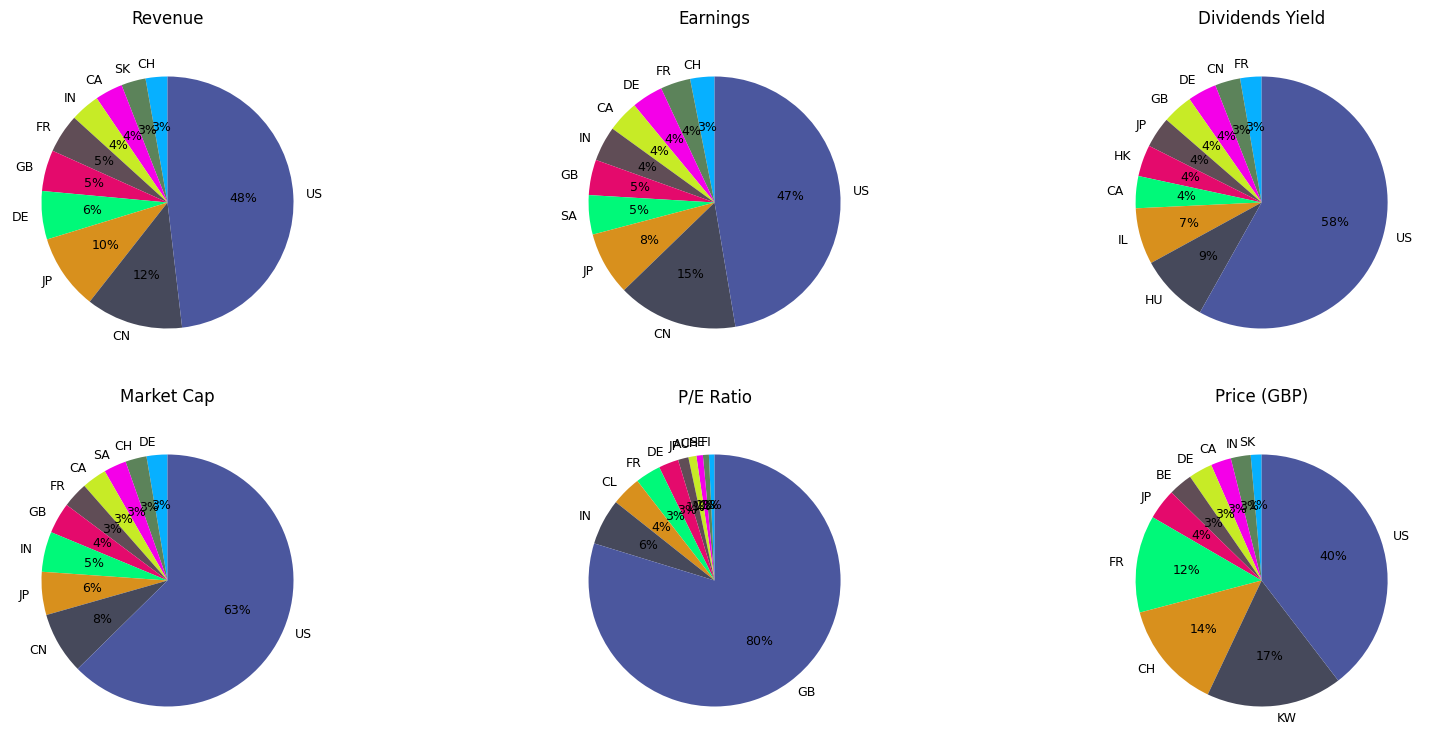

In [1105]:
lista_colonne = ["revenue_ttm", "earnings_ttm", "dividend_yield_ttm", "marketcap", "pe_ratio_ttm", "price(GBP)"]
lista_titoli = ["Revenue", "Earnings", "Dividends Yield", "Market Cap", "P/E Ratio", "Price (GBP)"]
listaposizioni = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
fig, ax = plt.subplots(2, 3, figsize=(20,9))

for colonna, posizione, titolo in zip(lista_colonne, listaposizioni, lista_titoli):
    toptencountry_byrev = df_pie.sort_values(by=colonna, ascending=False)[0:10]
    
    # plt.figure(figsize=(12,6))

    ax[posizione].pie(
    x=toptencountry_byrev[colonna][::-1],
    colors = ["#4b579e", "#46495b", "#d8901d", "#00f979", "#e40a6c", "#604d56", "#c7eb26", "#f400e8", "#5c835a", "#07b0ff"][::-1],
    startangle=90,
    autopct="%.0f%%",
    pctdistance=0.6,
    labeldistance= 1.1,
    labels=toptencountry_byrev["Code"][::-1],
    textprops={'fontsize': 9, 'color': 'black'}
    )
    
    ax[posizione].set_title(titolo, fontdict={"fontsize": 12, "fontstyle":"normal"}, loc="center", pad=15.5);

In [1106]:
df_italy = df_final[df_final["Code"]=="IT"]

In [1107]:
df_italy.head()

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code
70,E,ENI,Italy,98895013012,1.007720e+10,663.509,3.653572e+10,5.67616,23.239628,Italy,IT
91,ENEL.MI,Enel,Italy,89871180222,1.510180e+10,567.085,6.159539e+10,31.79180,6.064272,Italy,IT
103,G.MI,Generali,Italy,86209332084,4.537080e+09,482.296,3.360512e+10,0.00000,21.919837,Italy,IT
395,ISP.MI,Intesa Sanpaolo,Italy,29096097231,1.244700e+10,755.860,5.777398e+10,11.79890,3.238162,Italy,IT
434,UCG.MI,UniCredit,Italy,26406066714,1.383370e+10,446.688,5.258549e+10,8.51810,33.318834,Italy,IT


In [1108]:
import numpy as np

In [1111]:
topten = df_italy.sort_values("marketcap", ascending=False)[0:10]["Name"]
rest_of_the_firms = df_italy.loc[~df_italy["Name"].isin(topten), "marketcap"].sum()
df_italy["temp"] = np.where(df_italy["Name"].isin(topten), df_italy["marketcap"], rest_of_the_firms)

C:\Users\bmatt\AppData\Local\Temp\ipykernel_24672\1491788015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy["temp"] = np.where(df_italy["Name"].isin(topten), df_italy["marketcap"], rest_of_the_firms)


In [1116]:
df_toptenfirmsitaly = df_italy.loc[df_italy["Name"].isin(topten), :]

In [1127]:
df_toptenfirmsitaly

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code,temp
70,E,ENI,Italy,98895013012,1.007720e+10,663.5090,3.653572e+10,5.67616,23.239628,Italy,IT,3.653572e+10
91,ENEL.MI,Enel,Italy,89871180222,1.510180e+10,567.0850,6.159539e+10,31.79180,6.064272,Italy,IT,6.159539e+10
103,G.MI,Generali,Italy,86209332084,4.537080e+09,482.2960,3.360512e+10,0.00000,21.919837,Italy,IT,3.360512e+10
395,ISP.MI,Intesa Sanpaolo,Italy,29096097231,1.244700e+10,755.8600,5.777398e+10,11.79890,3.238162,Italy,IT,5.777398e+10
434,UCG.MI,UniCredit,Italy,26406066714,1.383370e+10,446.6880,5.258549e+10,8.51810,33.318834,Italy,IT,5.258549e+10
652,UNI.MI,Unipol Gruppo,Italy,17919266937,7.878440e+08,352.1230,1.394235e+10,0.00000,8.908074,Italy,IT,1.394235e+10
712,PRY.MI,Prysmian Group,Italy,16358622036,7.699690e+08,105.1860,1.593403e+10,28.29300,55.052982,Italy,IT,1.593403e+10
1466,RACE,Ferrari,Italy,6865301614,1.879600e+09,55.2069,6.509733e+10,67.42210,358.746007,Italy,IT,6.509733e+10
1852,1913.HK,Prada,Italy,5070566994,7.626440e+08,188.5530,1.500734e+10,0.00000,5.864943,Italy,IT,1.500734e+10
2277,TRN.MI,Terna,Italy,3669872142,1.828160e+09,410.5620,1.373907e+10,19.49760,6.849533,Italy,IT,1.373907e+10


In [1145]:
df_nottoptenfirmsitaly = df_italy.loc[~df_italy["Name"].isin(topten), :].head(1)

In [1148]:
df_nottoptenfirmsitaly

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code,temp
446,PST.MI,Rest,Italy,25904316189,2.803880e+09,624.26,1.372983e+10,10.1428,10.605264,Italy,IT,2.749683e+11


In [ ]:
df_nottoptenfirmsitaly.iloc[0, 1] = "Rest_of_firms"

In [ ]:
df_grafici = pd.concat([df_toptenfirmsitaly, df_nottoptenfirmsitaly], axis=0).sort_values()

In [1152]:
df_grafici

,Symbol,Name,country,revenue_ttm,earnings_ttm,dividend_yield_ttm,marketcap,pe_ratio_ttm,price(GBP),Country,Code,temp
70,E,ENI,Italy,98895013012,1.007720e+10,663.5090,3.653572e+10,5.67616,23.239628,Italy,IT,3.653572e+10
91,ENEL.MI,Enel,Italy,89871180222,1.510180e+10,567.0850,6.159539e+10,31.79180,6.064272,Italy,IT,6.159539e+10
103,G.MI,Generali,Italy,86209332084,4.537080e+09,482.2960,3.360512e+10,0.00000,21.919837,Italy,IT,3.360512e+10
395,ISP.MI,Intesa Sanpaolo,Italy,29096097231,1.244700e+10,755.8600,5.777398e+10,11.79890,3.238162,Italy,IT,5.777398e+10
434,UCG.MI,UniCredit,Italy,26406066714,1.383370e+10,446.6880,5.258549e+10,8.51810,33.318834,Italy,IT,5.258549e+10
652,UNI.MI,Unipol Gruppo,Italy,17919266937,7.878440e+08,352.1230,1.394235e+10,0.00000,8.908074,Italy,IT,1.394235e+10
712,PRY.MI,Prysmian Group,Italy,16358622036,7.699690e+08,105.1860,1.593403e+10,28.29300,55.052982,Italy,IT,1.593403e+10
1466,RACE,Ferrari,Italy,6865301614,1.879600e+09,55.2069,6.509733e+10,67.42210,358.746007,Italy,IT,6.509733e+10
1852,1913.HK,Prada,Italy,5070566994,7.626440e+08,188.5530,1.500734e+10,0.00000,5.864943,Italy,IT,1.500734e+10
2277,TRN.MI,Terna,Italy,3669872142,1.828160e+09,410.5620,1.373907e+10,19.49760,6.849533,Italy,IT,1.373907e+10


C:\Users\bmatt\AppData\Local\Temp\ipykernel_24672\2494432116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy["temp"] = np.where(df_italy["Name"].isin(topten), df_italy[colonna], rest_of_the_firms)


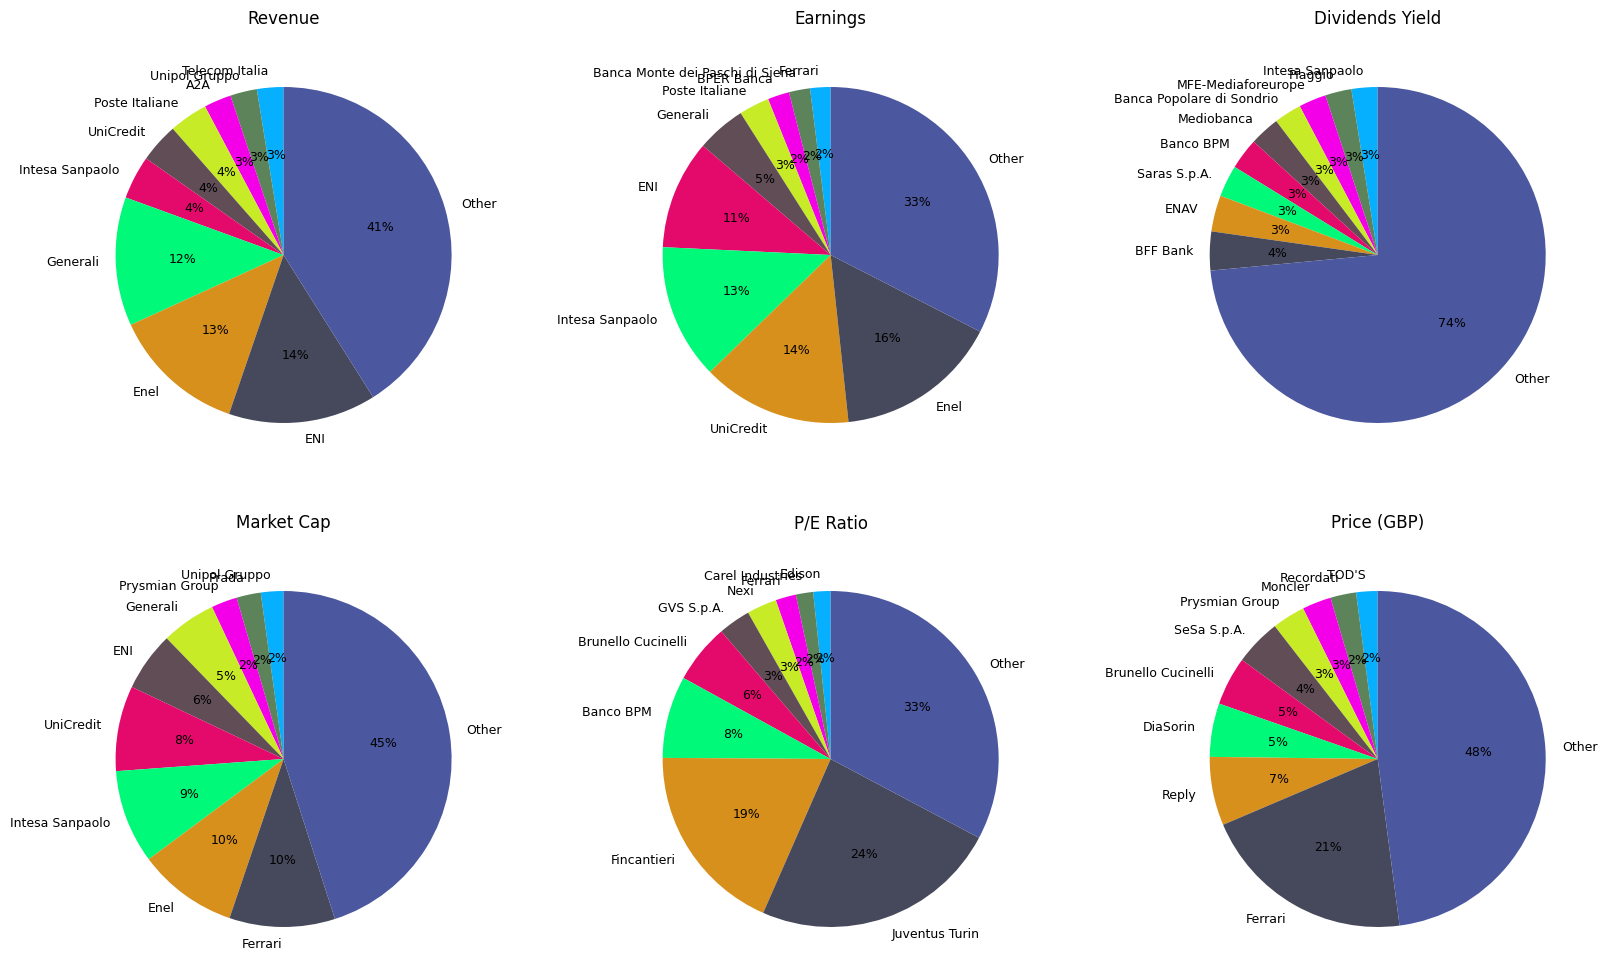

In [1169]:
lista_colonne = ["revenue_ttm", "earnings_ttm", "dividend_yield_ttm", "marketcap", "pe_ratio_ttm", "price(GBP)"]
lista_titoli = ["Revenue", "Earnings", "Dividends Yield", "Market Cap", "P/E Ratio", "Price (GBP)"]
listaposizioni = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
fig, ax = plt.subplots(2, 3, figsize=(20,12))

for colonna, posizione, titolo in zip(lista_colonne, listaposizioni, lista_titoli):
    topten = df_italy.sort_values(colonna, ascending=False).head(9)["Name"]
    rest_of_the_firms = df_italy.loc[~df_italy["Name"].isin(topten), colonna].sum()
    df_italy["temp"] = np.where(df_italy["Name"].isin(topten), df_italy[colonna], rest_of_the_firms)
    df_toptenfirmsitaly = df_italy.loc[df_italy["Name"].isin(topten), :]
    df_nottoptenfirmsitaly = df_italy.loc[~df_italy["Name"].isin(topten), :].head(1)
    df_nottoptenfirmsitaly.loc[:, "Name"] = "Other"
    
    df_grafici = pd.concat([df_toptenfirmsitaly, df_nottoptenfirmsitaly], axis=0).sort_values("temp", ascending=False)
    
    # plt.figure(figsize=(12,6))

    ax[posizione].pie(
    x=df_grafici["temp"][::-1],
    colors = ["#4b579e", "#46495b", "#d8901d", "#00f979", "#e40a6c", "#604d56", "#c7eb26", "#f400e8", "#5c835a", "#07b0ff"][::-1],
    startangle=90,
    autopct="%.0f%%",
    pctdistance=0.6,
    labeldistance= 1.1,
    labels=df_grafici["Name"][::-1],
    textprops={'fontsize': 9, 'color': 'black'}
    )
    
    ax[posizione].set_title(titolo, fontdict={"fontsize": 12, "fontstyle":"normal"}, loc="center", pad=15.5);